# Decision Trees

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

In [3]:
DATAPATH = 'data/breastCancer.csv'

data = pd.read_csv(DATAPATH)

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


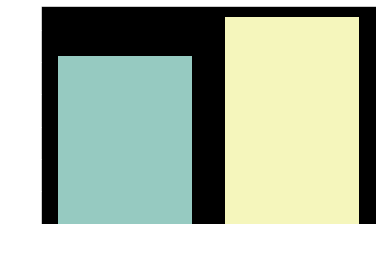

In [4]:
x = data['Classification']
ax = sns.countplot(x=x, data=data)


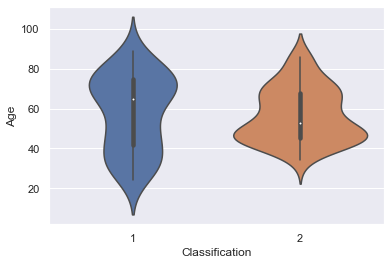

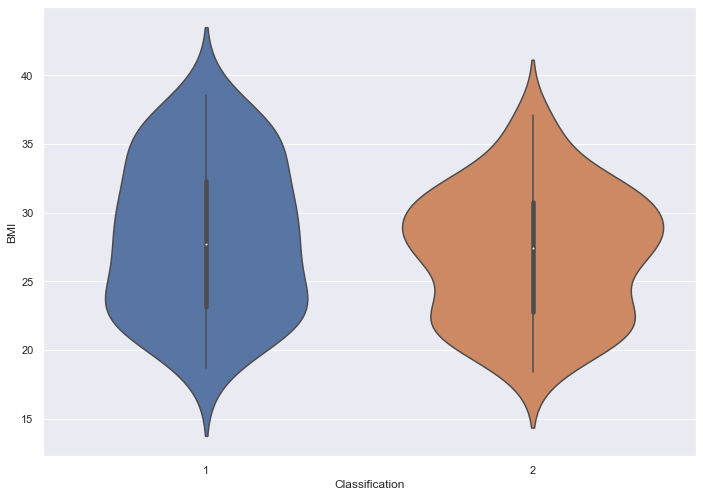

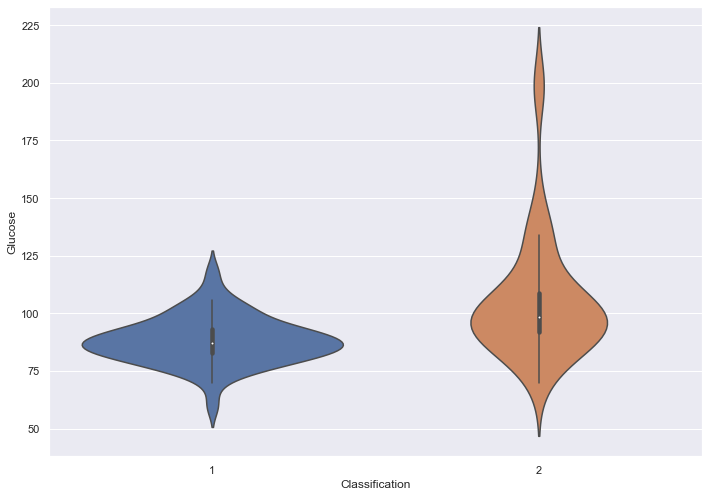

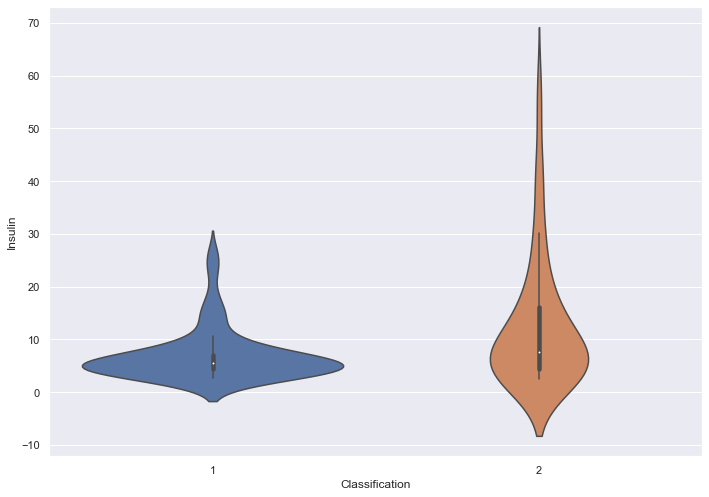

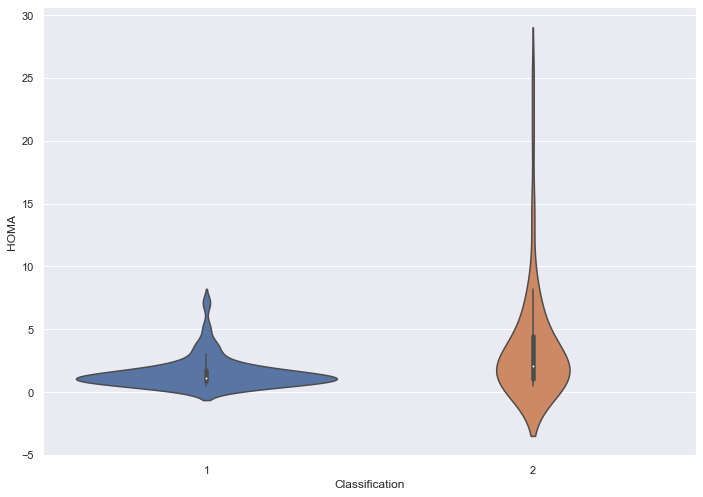

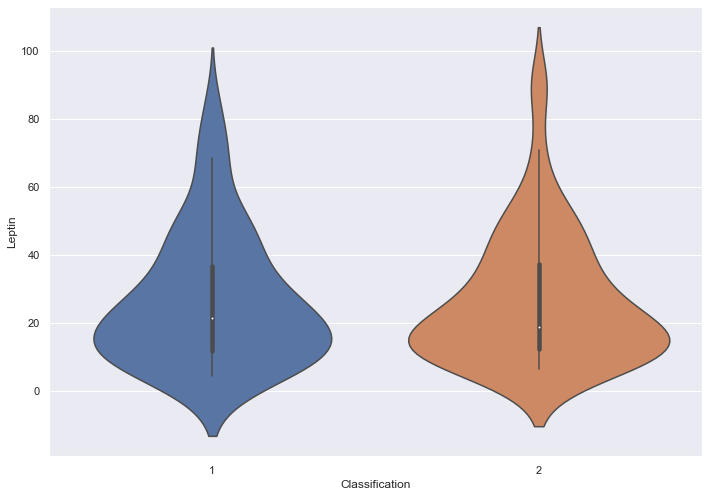

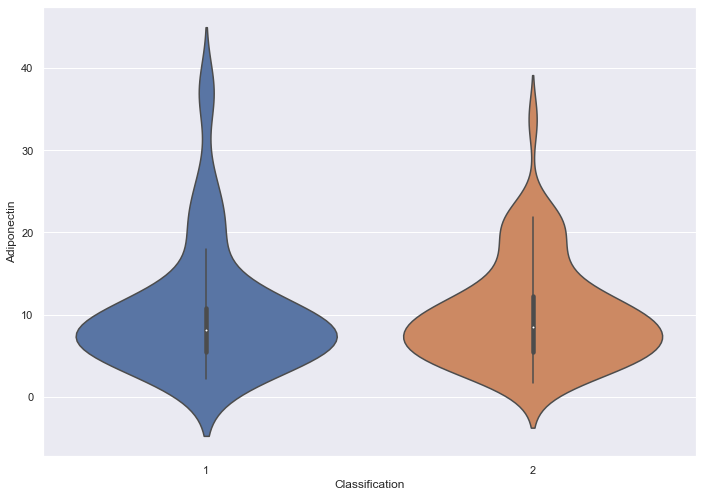

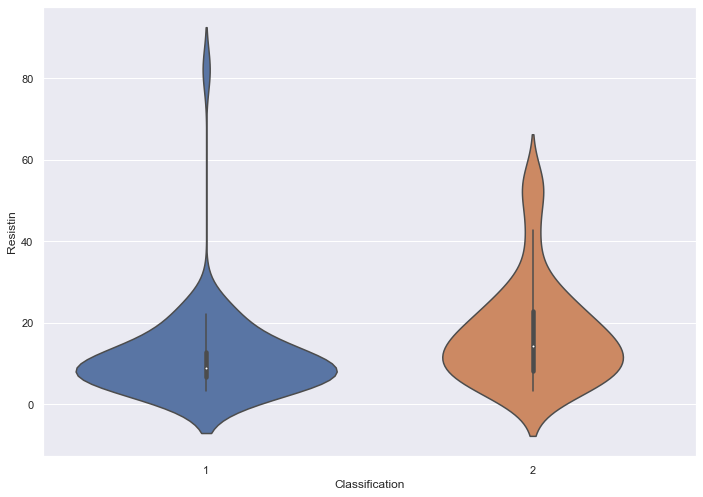

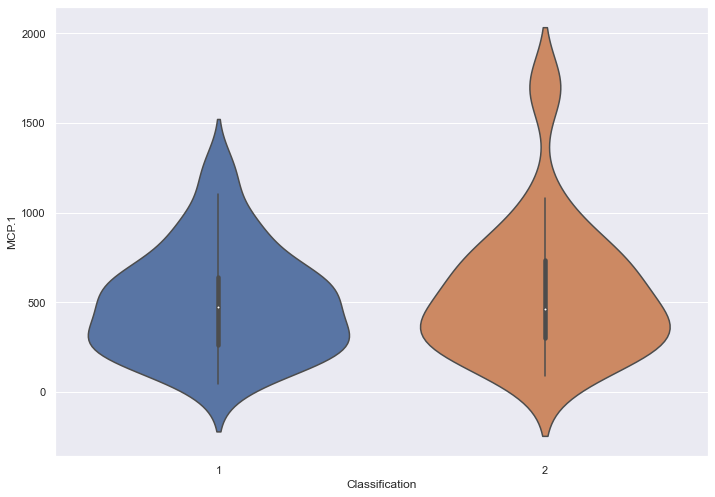

In [5]:
def violinn_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data=data)

y = data.columns[:-1]
x = data.columns[-1]

violinn_plots(x, y, data)

In [6]:
for col in data.columns:
    print(f'{col} {data[col].isnull().sum() } ')

Age 0 
BMI 0 
Glucose 0 
Insulin 0 
HOMA 0 
Leptin 0 
Adiponectin 0 
Resistin 0 
MCP.1 0 
Classification 0 


## Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [8]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
x = data.drop(['Classification'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

### Baseline Decision Tree

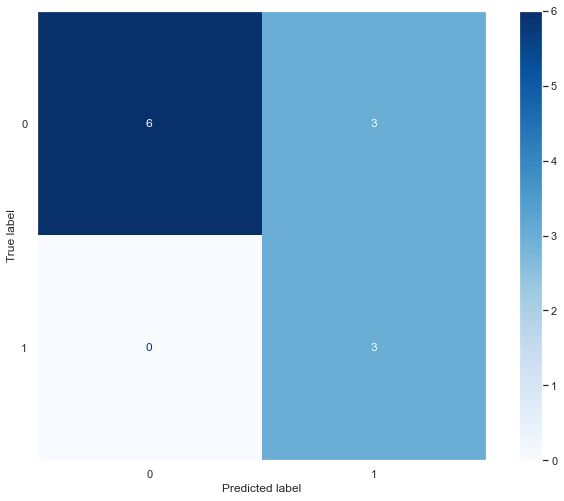

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

[Text(317.3625, 417.44597142857134, 'X[2] <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]'),
 Text(199.485, 353.22351428571426, 'X[0] <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28, 15]'),
 Text(163.215, 289.0010571428571, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(235.75500000000002, 289.0010571428571, 'X[7] <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]'),
 Text(145.08, 224.77859999999998, 'X[0] <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]'),
 Text(72.54, 160.55614285714285, 'X[6] <= 7.189\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(36.27, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(108.81, 96.3336857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(217.62, 160.55614285714285, 'X[7] <= 3.295\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(181.35000000000002, 96.3336857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(253.89000000000001, 96.3336857142857, 'X[5] <= 8.747\ngini = 0.142\nsamples = 13\nv

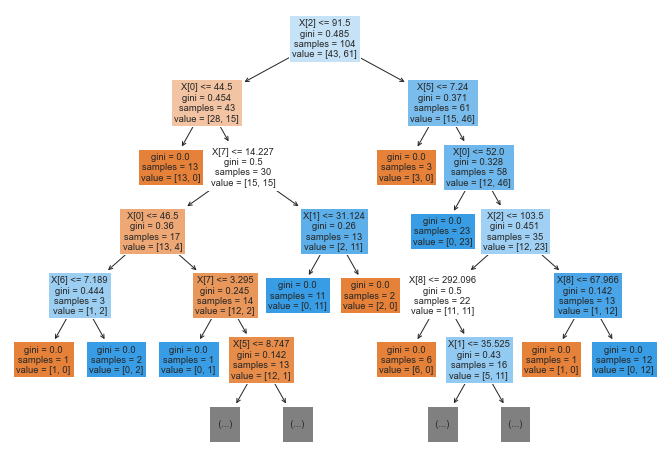

In [10]:
from sklearn.tree import plot_tree

plot_tree(clf, max_depth=5, filled=True)

### Bagging

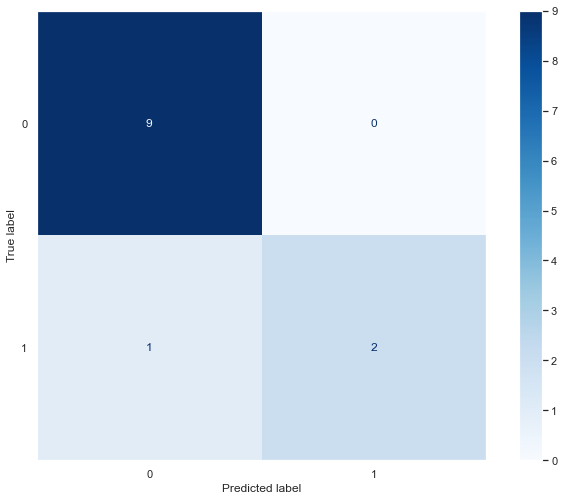

In [11]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier()

bagging_clf.fit(x_train, y_train.ravel())

plot_confusion_matrix(bagging_clf, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Random Forest Classifier

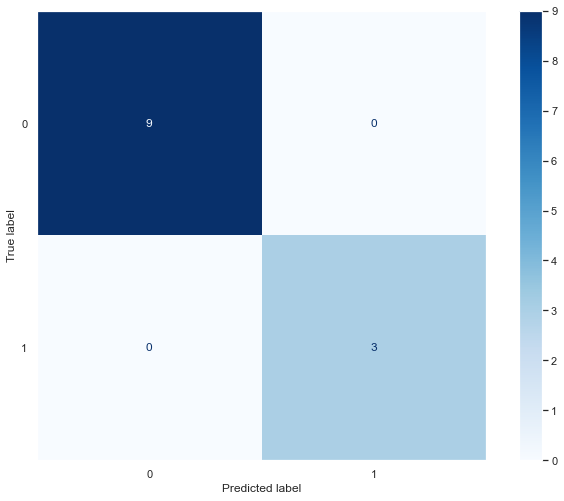

In [13]:
from sklearn.ensemble import RandomForestClassifier

random_f_clf = RandomForestClassifier(100)

random_f_clf.fit(x_train, y_train.ravel())

plot_confusion_matrix(random_f_clf, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Boosting

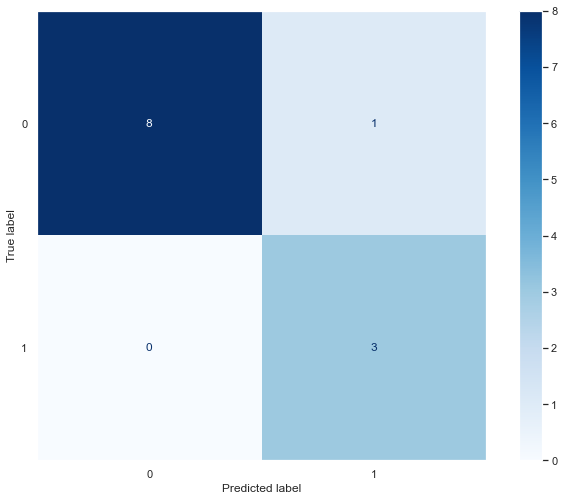

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gboost_clf = GradientBoostingClassifier()

gboost_clf.fit(x_train, y_train.ravel())

plot_confusion_matrix(gboost_clf, x_test, y_test, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()